<a href="https://colab.research.google.com/github/amirnasirak/amirnasirak/blob/main/Copy_of_Lab_6_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Data Imputation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#titanic = sns.load_dataset('titanic')
#titanic.to_csv('titanic.csv')

## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/heart_2020_cleaned.csv')

In [ ]:
train.shape

(319795, 18)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
train.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [ ]:
train.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
train.nunique()

,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [ ]:
train['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

Let's check the frequency of survived and not survived people in the dataset.

<Axes: xlabel='HeartDisease', ylabel='count'>

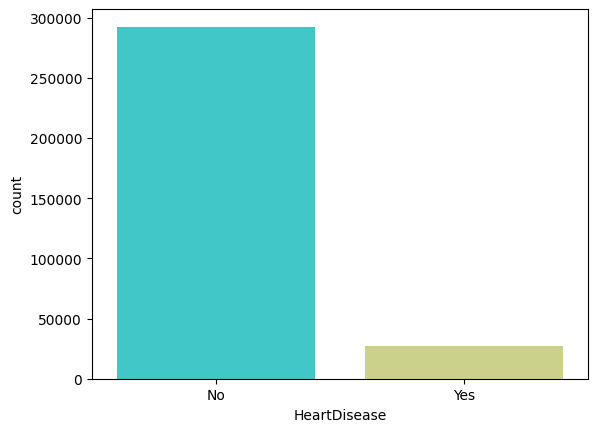

In [ ]:
sns.countplot(x='HeartDisease',data=train,palette='rainbow',hue='HeartDisease',legend=False)

In [ ]:
# Method 1: Using len()
num_yes = len(train[train['HeartDisease'] == 'Yes'])
print(f"Number of 'Yes' in HeartDisease column: {num_yes}")

num_yes = (train['HeartDisease'] == 'No').sum()
print(f"Number of 'No' in HeartDisease column: {num_yes}")

Number of 'Yes' in HeartDisease column: 27373
Number of 'No' in HeartDisease column: 292422


In [ ]:
# Filter for 'No' values
no_values = train[train['HeartDisease'] == 'No']

# Sample 50% of 'No' values
sample_fraction = 0.5  # Adjust this value to control the percentage of 'No' values to drop
sampled_indices = no_values.sample(frac=sample_fraction).index

In [ ]:
# Drop the sampled rows from the original DataFrame
train = train.drop(sampled_indices)

<Axes: xlabel='HeartDisease', ylabel='count'>

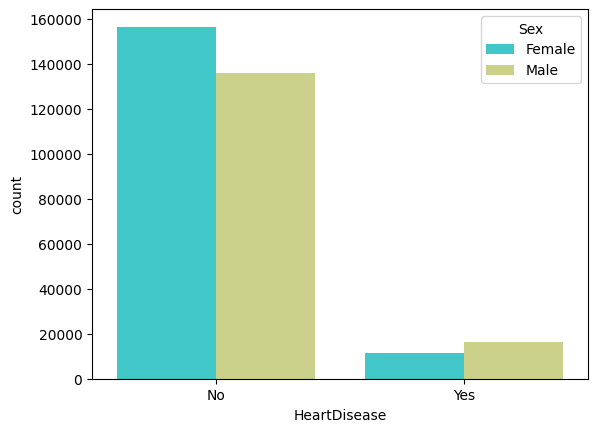

In [ ]:
sns.countplot(x='HeartDisease',hue='Sex',data=train,palette='rainbow')
#plt.xlabel("Heart Disease status")
#plt.legend(title="Sex")
#plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

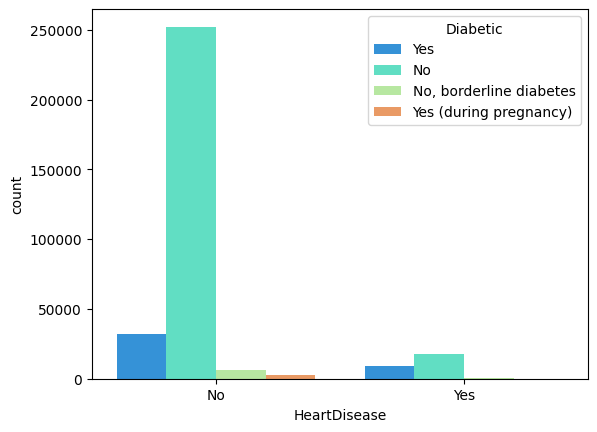

In [ ]:
sns.countplot(x='HeartDisease',hue='Diabetic',data=train,palette='rainbow')

<ipython-input-13-47c392202e06>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeCategory',data=train,palette='rainbow')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '55-59'),
  Text(1, 0, '80 or older'),
  Text(2, 0, '65-69'),
  Text(3, 0, '75-79'),
  Text(4, 0, '40-44'),
  Text(5, 0, '70-74'),
  Text(6, 0, '60-64'),
  Text(7, 0, '50-54'),
  Text(8, 0, '45-49'),
  Text(9, 0, '18-24'),
  Text(10, 0, '35-39'),
  Text(11, 0, '30-34'),
  Text(12, 0, '25-29')])

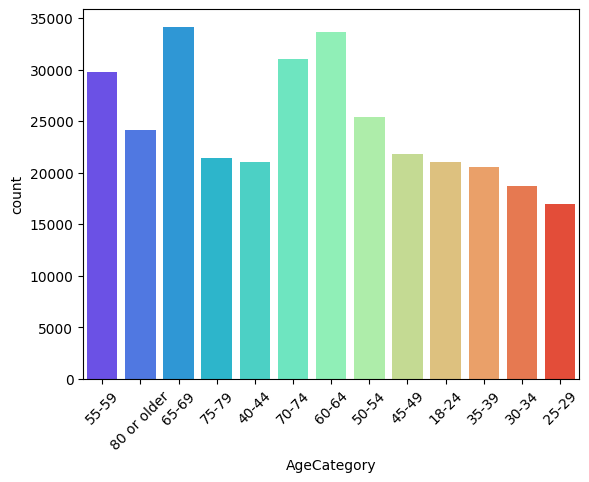

In [ ]:
sns.countplot(x='AgeCategory',data=train,palette='rainbow')
plt.xticks(rotation=45)

<Axes: xlabel='BMI', ylabel='Count'>

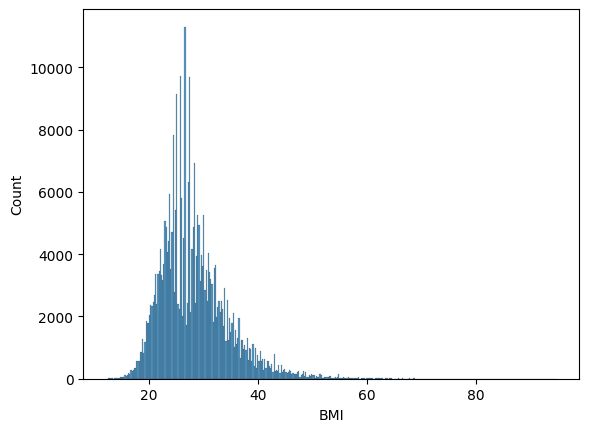

In [ ]:
sns.histplot(train['BMI'])

<Axes: >

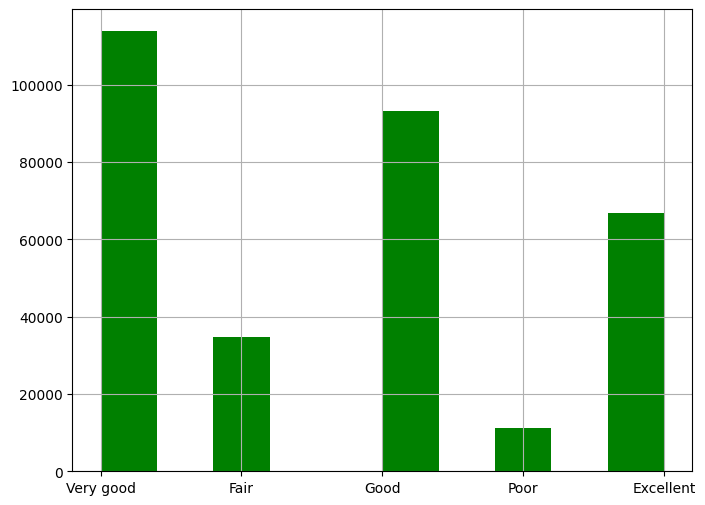

In [ ]:
train['GenHealth'].hist(color='green', figsize=(8,6))

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'American Indian/Alaskan Native'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic')])

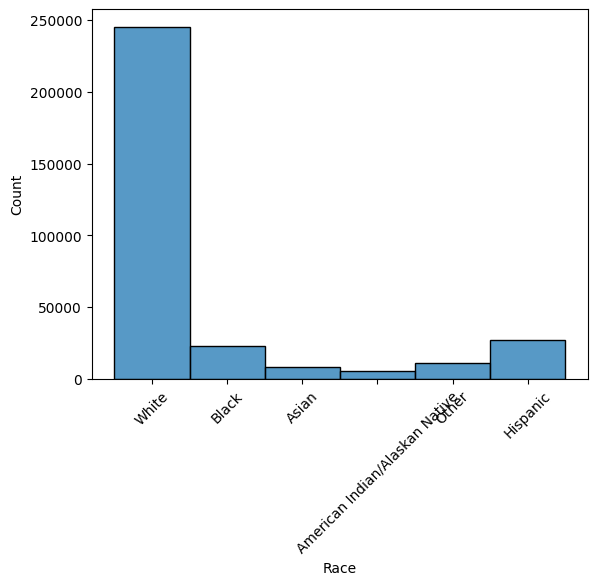

In [ ]:
sns.histplot(train['Race'])
plt.xticks(rotation=45)

<Axes: xlabel='GenHealth', ylabel='PhysicalHealth'>

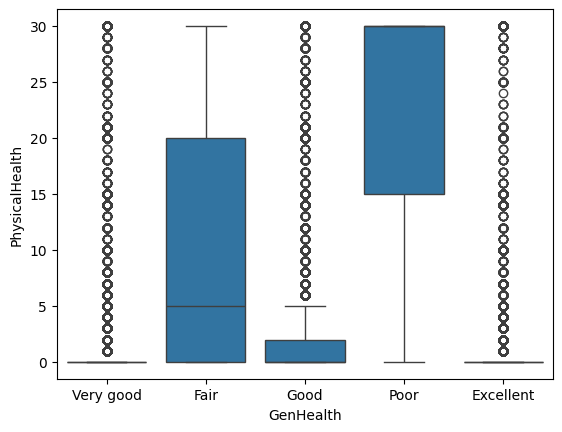

In [ ]:
sns.boxplot(y='PhysicalHealth', x='GenHealth', data=train)

<Axes: ylabel='SleepTime'>

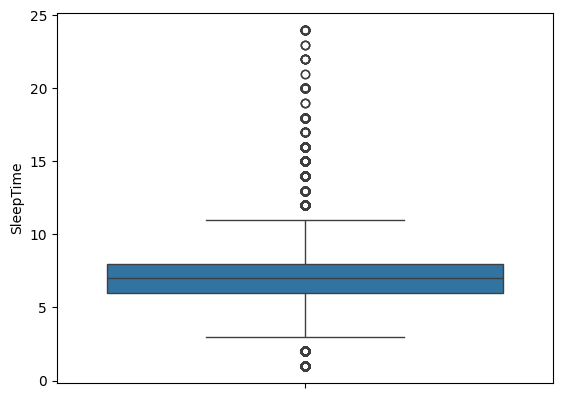

In [ ]:
sns.boxplot(y='SleepTime', data=train)

# **Outlier Removal**

In [ ]:
#train=train[train['Age'] < 66]

In [ ]:
#sns.boxplot(y='Age', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [ ]:
train.drop(['Stroke','Race','SkinCancer'],axis=1,inplace=True)

In [ ]:
train.shape

(319795, 15)

In [ ]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease'],
      dtype='object')

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [ ]:
train.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0
Diabetic,0


In [ ]:
train.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

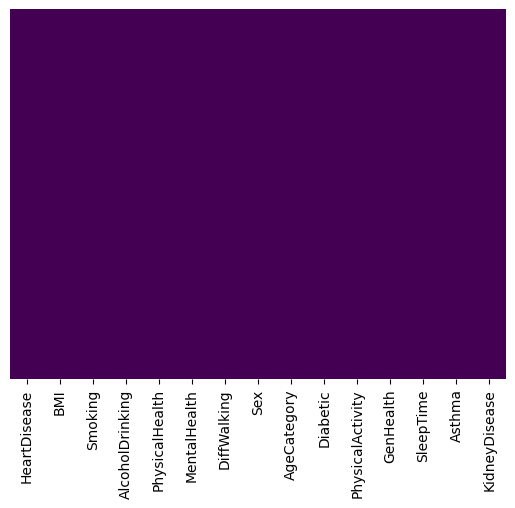

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('KidneyDisease',axis=1,inplace=True)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No


In [ ]:
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
mean_values = train.groupby('GenHealth')['SleepTime'].mean()
print(mean_values)

GenHealth
Excellent    7.205514
Fair         6.928569
Good         7.066327
Poor         6.848791
Very good    7.134501
Name: SleepTime, dtype: float64


We can see the Sleep time Is depending Generat Health, which makes sense. We'll use these average age values to impute based on GenHealth for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-349-b8fc05cf2ef4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-349-b8fc05cf2ef4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now let's check that heat map again!

<Axes: >

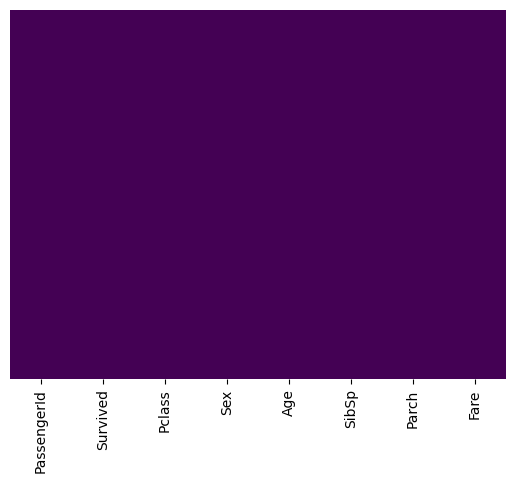

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Identifying Duplicated Columns**

In [ ]:
new_var = train.loc[train.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
777,No,25.10,Yes,No,0.0,0.0,No,Male,80 or older,No,Yes,Very good,8.0,No
2182,No,19.85,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Excellent,7.0,No
3182,No,28.19,No,No,0.0,0.0,No,Female,50-54,No,Yes,Excellent,7.0,No
3397,No,26.54,No,No,0.0,0.0,No,Male,45-49,No,Yes,Excellent,6.0,No
3650,No,32.89,Yes,No,2.0,1.0,No,Female,50-54,No,Yes,Good,9.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319751,No,34.96,No,No,0.0,0.0,No,Male,18-24,No,Yes,Excellent,6.0,No
319768,No,32.78,No,No,0.0,0.0,No,Male,45-49,No,Yes,Very good,6.0,No
319776,No,27.98,No,No,0.0,0.0,No,Female,50-54,No,No,Good,8.0,No
319783,No,33.28,No,No,0.0,0.0,No,Female,30-34,No,Yes,Excellent,8.0,No


In [ ]:
duplicate_rows = train.loc[train.duplicated()]
print(duplicate_rows)

       HeartDisease    BMI Smoking AlcoholDrinking  PhysicalHealth  \
777              No  25.10     Yes              No             0.0   
2182             No  19.85      No              No             0.0   
3182             No  28.19      No              No             0.0   
3397             No  26.54      No              No             0.0   
3650             No  32.89     Yes              No             2.0   
...             ...    ...     ...             ...             ...   
319751           No  34.96      No              No             0.0   
319768           No  32.78      No              No             0.0   
319776           No  27.98      No              No             0.0   
319783           No  33.28      No              No             0.0   
319788           No  23.38      No              No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory Diabetic  \
777              0.0          No    Male  80 or older       No   
2182             0.0       

In [ ]:
train.loc[train.duplicated(subset=['HeartDisease'])]

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No
6,No,21.63,No,No,15.0,0.0,No,Female,70-74,No,Yes,Fair,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,7.0,0.0,Yes,Male,60-64,Yes,No,Fair,6.0,Yes
319791,No,29.84,Yes,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,Yes
319792,No,24.24,No,No,0.0,0.0,No,Female,45-49,No,Yes,Good,6.0,No
319793,No,32.81,No,No,0.0,0.0,No,Female,25-29,No,No,Good,12.0,No


In [ ]:
# Checking an example duplicate
train.query('HeartDisease == "Yes"')

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
5,Yes,28.87,Yes,No,6.0,0.0,Yes,Female,75-79,No,No,Fair,12.0,No
10,Yes,34.30,Yes,No,30.0,0.0,Yes,Male,60-64,Yes,No,Poor,15.0,Yes
35,Yes,32.98,Yes,No,10.0,0.0,Yes,Male,75-79,Yes,Yes,Poor,4.0,No
42,Yes,25.06,No,No,0.0,0.0,Yes,Female,80 or older,Yes,No,Good,7.0,No
43,Yes,30.23,Yes,No,6.0,2.0,Yes,Female,75-79,Yes,Yes,Fair,8.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,30.0,15.0,Yes,Female,55-59,Yes,Yes,Poor,6.0,Yes
319767,Yes,36.21,Yes,No,0.0,0.0,Yes,Female,75-79,Yes,Yes,Good,8.0,No
319781,Yes,37.12,Yes,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,7.0,No
319786,Yes,33.20,Yes,No,0.0,0.0,No,Female,60-64,Yes,Yes,Very good,8.0,Yes


##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
dtypes: float64(4), object(10)
memory usage: 34.2+ MB


In [ ]:
sex = pd.get_dummies(train['Sex'],dtype=int)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No


In [ ]:
train = pd.concat([train,sex],axis=1)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,Female,Male
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,1,0
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,1,0
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,0,1
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,1,0
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,1,0


In [ ]:
train.drop(['Sex'],axis=1,inplace=True)

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,Female,Male
0,No,16.60,Yes,No,3.0,30.0,No,55-59,Yes,Yes,Very good,5.0,Yes,1,0
1,No,20.34,No,No,0.0,0.0,No,80 or older,No,Yes,Very good,7.0,No,1,0
2,No,26.58,Yes,No,20.0,30.0,No,65-69,Yes,Yes,Fair,8.0,Yes,0,1
3,No,24.21,No,No,0.0,0.0,No,75-79,No,No,Good,6.0,No,1,0
4,No,23.71,No,No,28.0,0.0,Yes,40-44,No,Yes,Very good,8.0,No,1,0


In [ ]:
train = train.rename(columns={'Male':'MALE'})

In [ ]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,Female,MALE
0,No,16.60,Yes,No,3.0,30.0,No,55-59,Yes,Yes,Very good,5.0,Yes,1,0
1,No,20.34,No,No,0.0,0.0,No,80 or older,No,Yes,Very good,7.0,No,1,0
2,No,26.58,Yes,No,20.0,30.0,No,65-69,Yes,Yes,Fair,8.0,Yes,0,1
3,No,24.21,No,No,0.0,0.0,No,75-79,No,No,Good,6.0,No,1,0
4,No,23.71,No,No,28.0,0.0,Yes,40-44,No,Yes,Very good,8.0,No,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   AgeCategory       319795 non-null  object 
 8   Diabetic          319795 non-null  object 
 9   PhysicalActivity  319795 non-null  object 
 10  GenHealth         319795 non-null  object 
 11  SleepTime         319795 non-null  float64
 12  Asthma            319795 non-null  object 
 13  Female            319795 non-null  int64  
 14  MALE              319795 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 36.6+ MB


In [ ]:
def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")

    for col in df.columns:
        col_dtype = df[col].dtype

        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")

In [ ]:
describe_df(train)

The dataset contains 18 columns and 319795 rows

Column: HeartDisease (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: BMI (float64)
--- Summary statistics:
 count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

Column: Smoking (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Yes' 'No']

Column: AlcoholDrinking (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: Stroke (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: PhysicalHealth (float64)
--- Summary statistics:
 count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

Column: MentalHealth (float64)
--- Summary statistics:
 count

# Lab Task

Perform the steps mentioned above on the following datasete

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease